In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
def drow_price_chart(ymd_list):
    ''' 
    게임 가격 변화 그래프 그리는 함수 
    인자로 년도 전달(text list 형식)
    '''
    
    # 데이터 프레임 생성
    # 병합시 file_path 수정 필요
    # 데이터 출처: https://steamdb.info/app/578080/ 에 price history
    df = pd.read_csv('./lifetime_price_chart.csv', sep =',')
    
    # NaN값 0으로 채우기
    df.fillna(0, inplace=True)
        
    # join함수를 이용하여 이어주고 contains 함수에 넣기
    ymd = '|'.join(ymd_list)
    df = df[df['DateTime'].str.contains(ymd)]
    
    # 차트에 그려질 x, y 축 값 변수로 저장
    # x 축 데이터에 시간 정보 제거후 날짜값만 리스트로 저장
    x = [date.split(' ')[0] for date in df['DateTime']]
    y = df['Final price']

    # 차트 크기 조절
    plt.figure(figsize=(25, 3))

    # 차트 그리기 
    plt.plot(x, y, marker='o', label='가격 변화')

    # 범례설정
    plt.legend()

    # 축 텍스트 60도로 회전 및 텍스트 크기 줄이기
    plt.xticks(rotation=60, fontsize=8)
    
    # 격자 생성
    plt.grid(linestyle='--', linewidth=0.3)

    # 불필요한 텍스트 제거 (그래프만 표시)
    plt.show()

def get_label(col):
    ''' 넘겨 받은 column 이름으로 label 만드는 함수 '''

    label_dict = {
        'rank': '랭킹', 
        'percent': '점유율', 
        'use_time': '사용시간',
        'use_tiem_prev_week':'전주대비 사용시간',
    }
    return label_dict[col]

def drow_pc_chart(**kwargs):
    ''' 
    pc방 차트 그리는 함수 
    
    년월주 리스트 (x축), 컬럼명(y축), 그래프 색상을 **kwargs 형식으로 전달
    '''
    
    # 데이터프레임 생성
    # 병합시 file_path 수정 필요
    # 데이터 출처: https://www.thelog.co.kr/report/reportList.do pc방 주간 리포트 
    df = pd.read_excel('./pc_room_share_chart.xlsx', skiprows=[0])
    
    # 년월주 리스트
    ymw_list = kwargs['ymw_list']
    
    # 컬럼
    col = kwargs['col']
    
    # 라벨
    label = get_label(col)
    
    # 컬러
    color = kwargs['color']

    # 입력 받은 년월주 정보만 가져오기
    # join함수를 이용하여 이어주고 contains 함수에 넣기
    ymw = '|'.join(ymw_list)
    df = df[df['date'].str.contains(ymw)]

    # 차트 크기 조절
    plt.figure(figsize=(25, 3))

    # 차트 그리기
    plt.bar(df['date'], df[col], label=label, color=color, alpha=0.5)
    
    # x축 글자 60도 회전 시키기 및 글자 사이즈 조절
    plt.xticks(rotation=60, fontsize=10)
    
    # 격자 생성
    plt.grid(linestyle='--', linewidth=0.3)

    # 범례
    plt.legend()
    plt.show()

In [3]:
''' 
년월로 나누기 위한 리스트 목록 

가격 변화 그래프의 날짜와 x 축(날짜)과 비슷하게 맞추기 위한 분류

필요시 리스트로 만들어 사용가능
EX:) ['2019', 2020] // 19년도와 20년도 전체 데이터 가져오기
'''

_2019 = ['2019년 1월', '2019년 6월', '2019년 7월', '2019년 10월', '2019년 11월', '2019년 12월']
_2020 = ['2020년 1월', "2020년 4월", '2020년 6월', '2020년 7월', '2020년 11월', '2020년 12월']
_2021 = ['2021년 2월', '2021년 4월', '2021년 5월', '2021년 6월', '2021년 7월']
_2022 = ['2022년 1월', '2022년 9월']

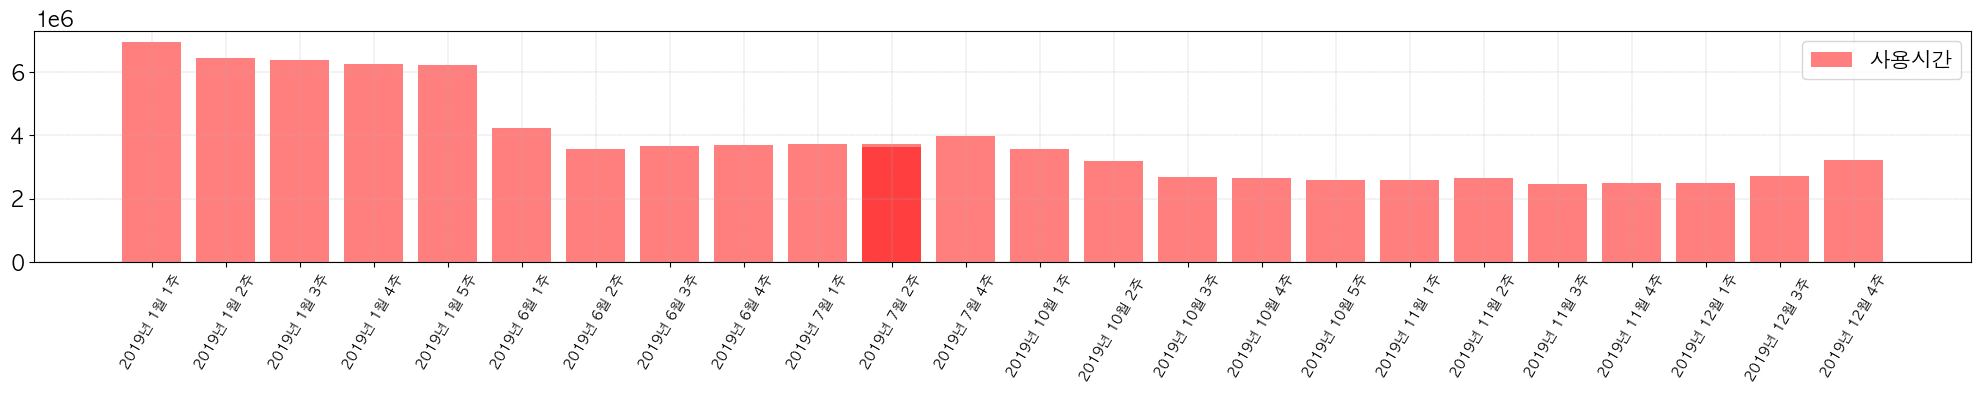

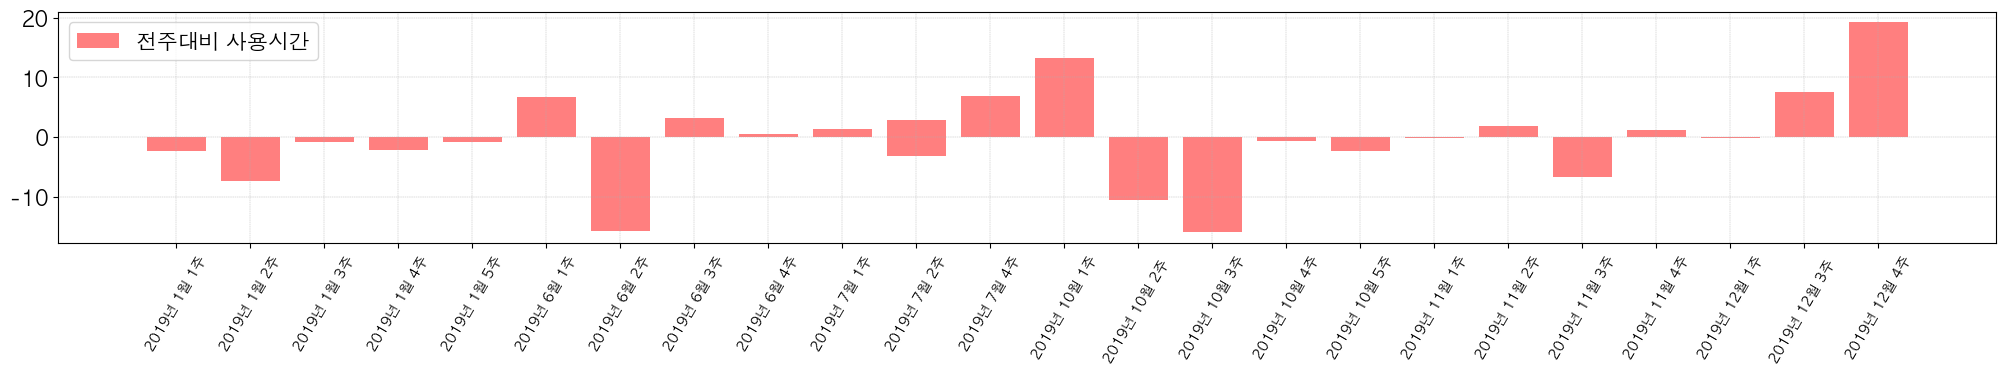

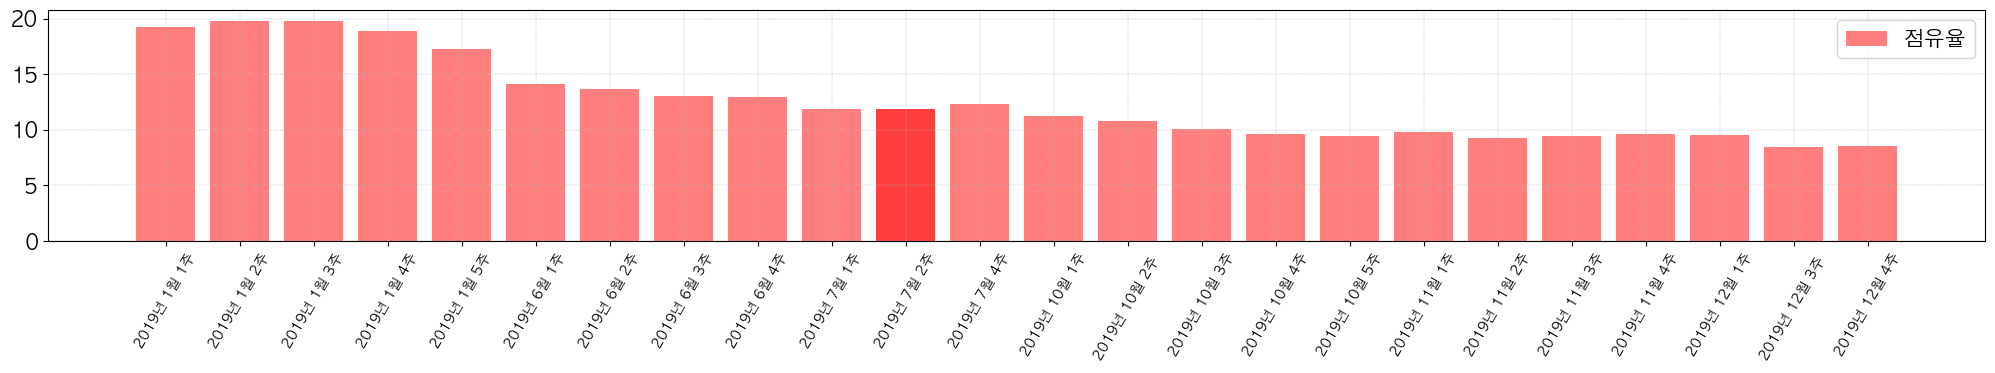

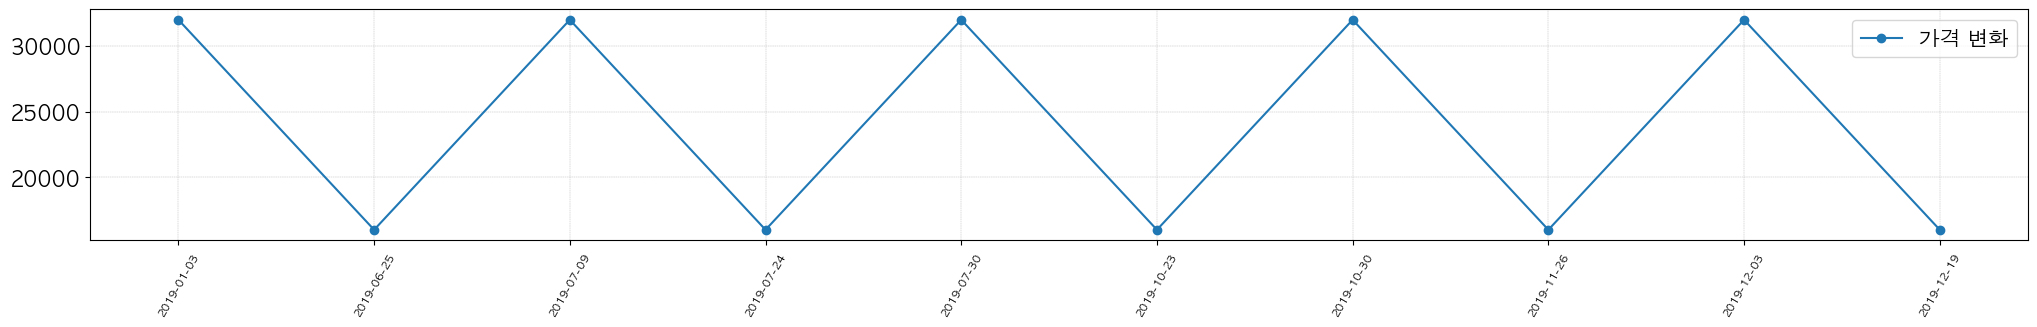

In [4]:
''' pc방 점유율 차트 그리기
    pc방 사용시간 차트 그리기
    pc방 전주대비 사용시간 차트 그리기 
    
    drow_price_chart() // 인자로 년월일 전달(text list 형식) 
    EX:) ['2019'] / [2019-01] / [2019-01-01]
    
    drow_pc_chart() // 인자로 년월주 리스트 (x축), 컬럼명(y축), 그래프 색상을 **kwargs 형식으로 전달
'''

# 2019년도
drow_pc_chart(ymw_list=_2019, col='use_time', color='red')
drow_pc_chart(ymw_list=_2019, col='use_tiem_prev_week', color='red')
drow_pc_chart(ymw_list=_2019, col='percent', color='red')
drow_price_chart(['2019'])


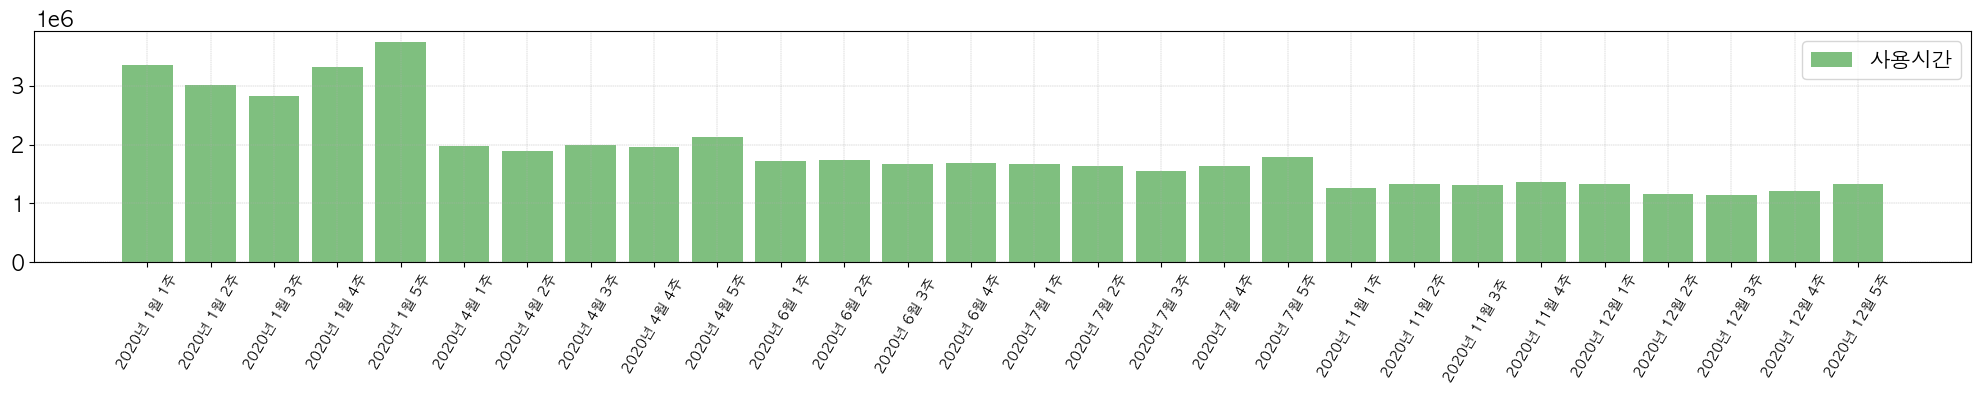

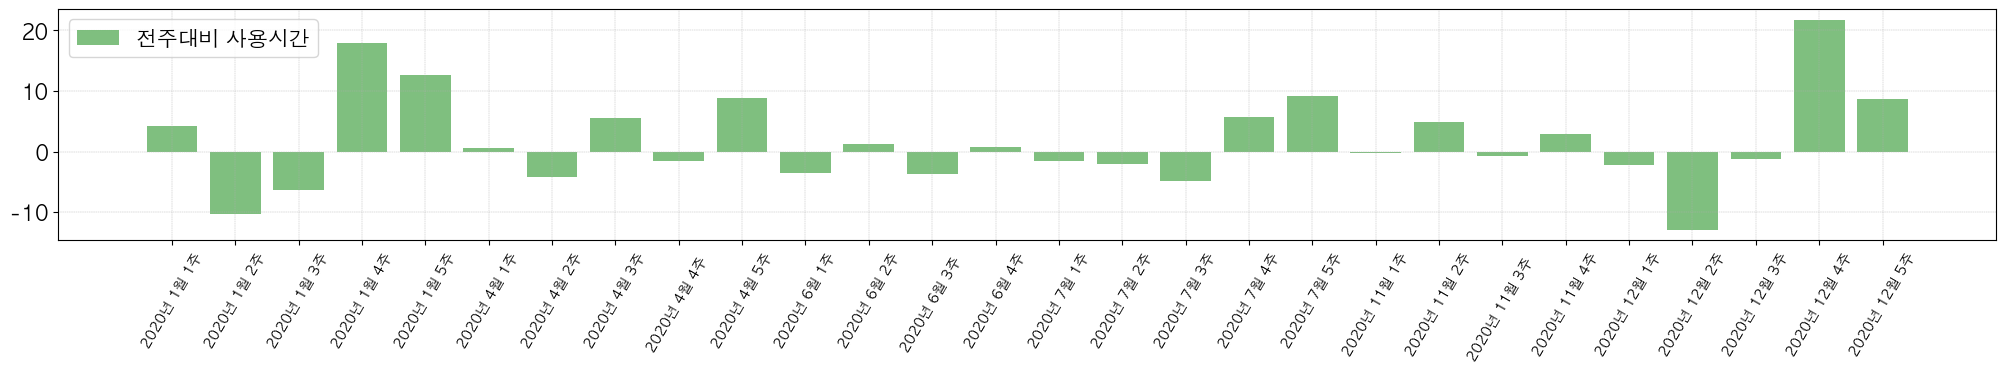

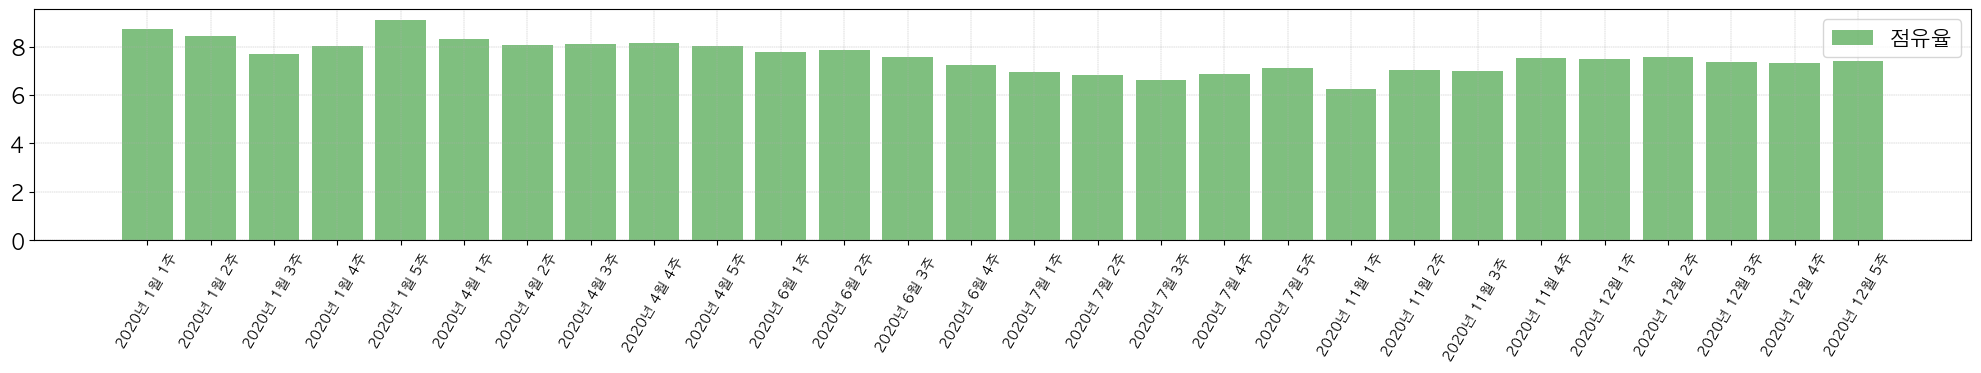

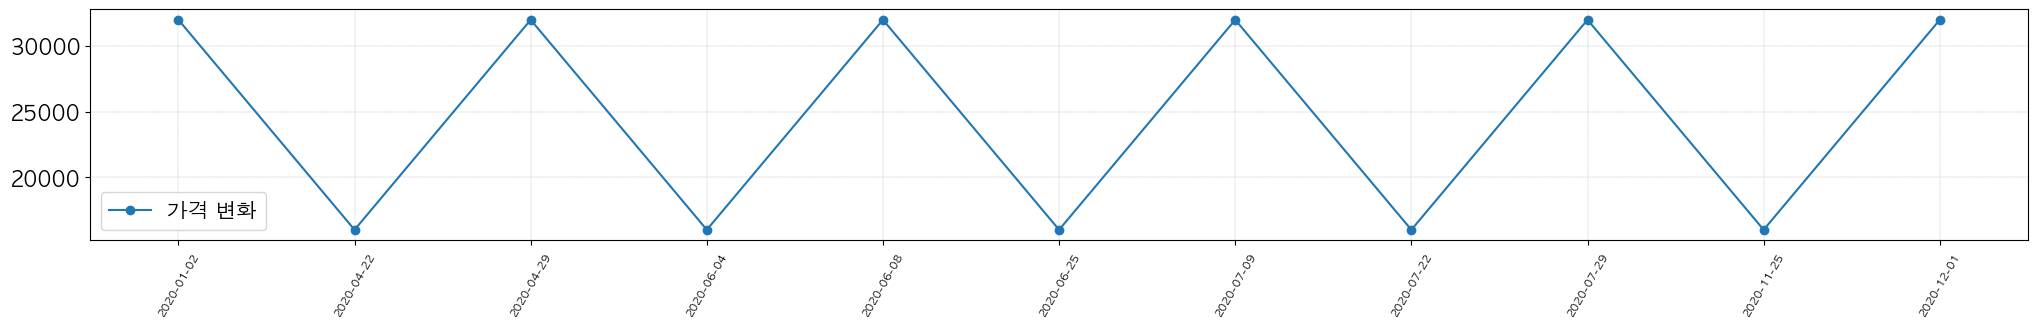

In [5]:
# 2020년도
drow_pc_chart(ymw_list=_2020, col='use_time', color='green')
drow_pc_chart(ymw_list=_2020, col='use_tiem_prev_week', color='green')
drow_pc_chart(ymw_list=_2020, col='percent', color='green')
drow_price_chart(['2020'])

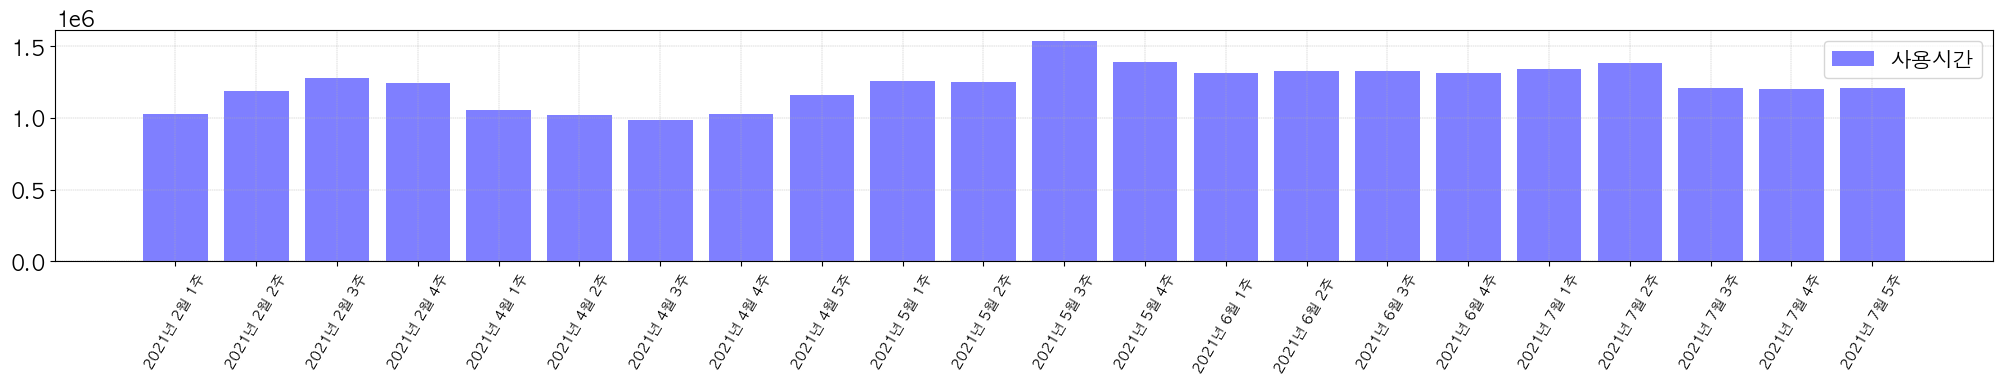

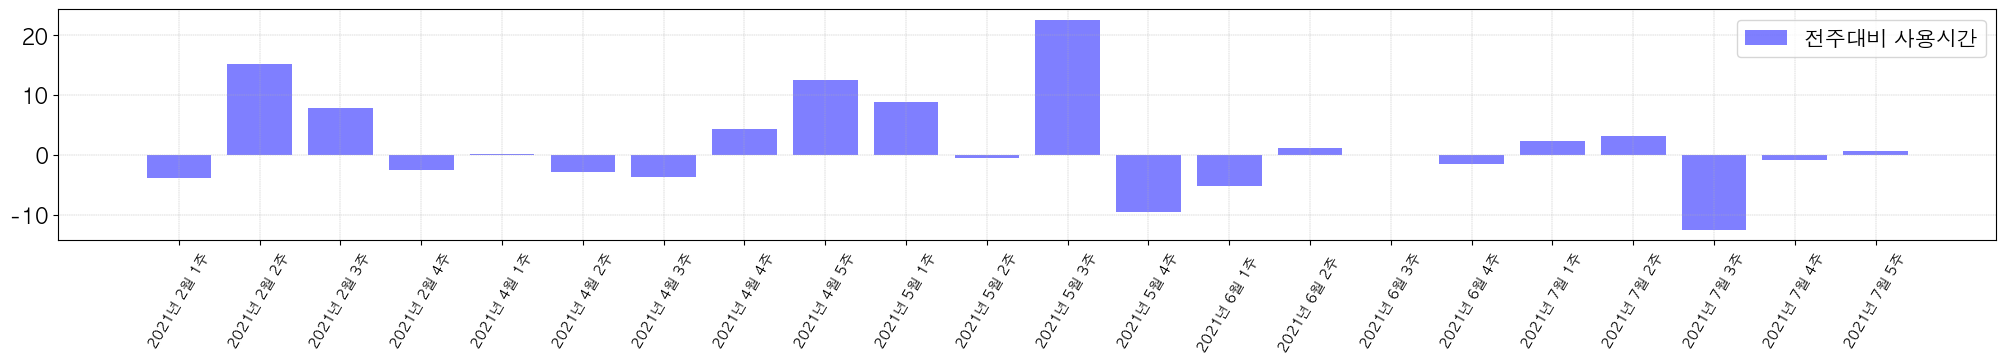

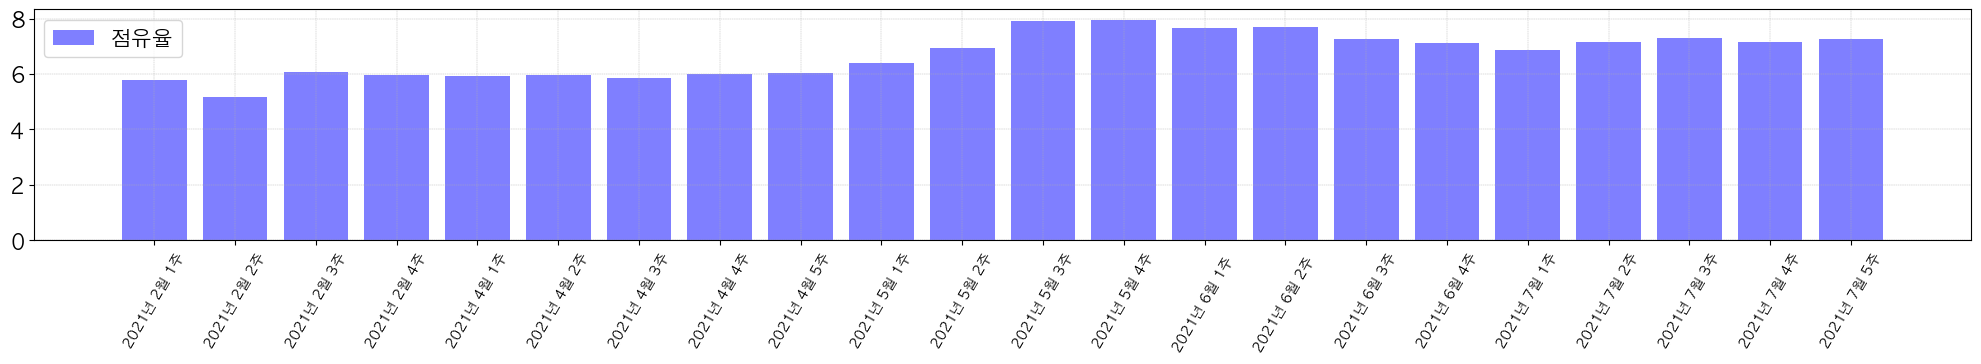

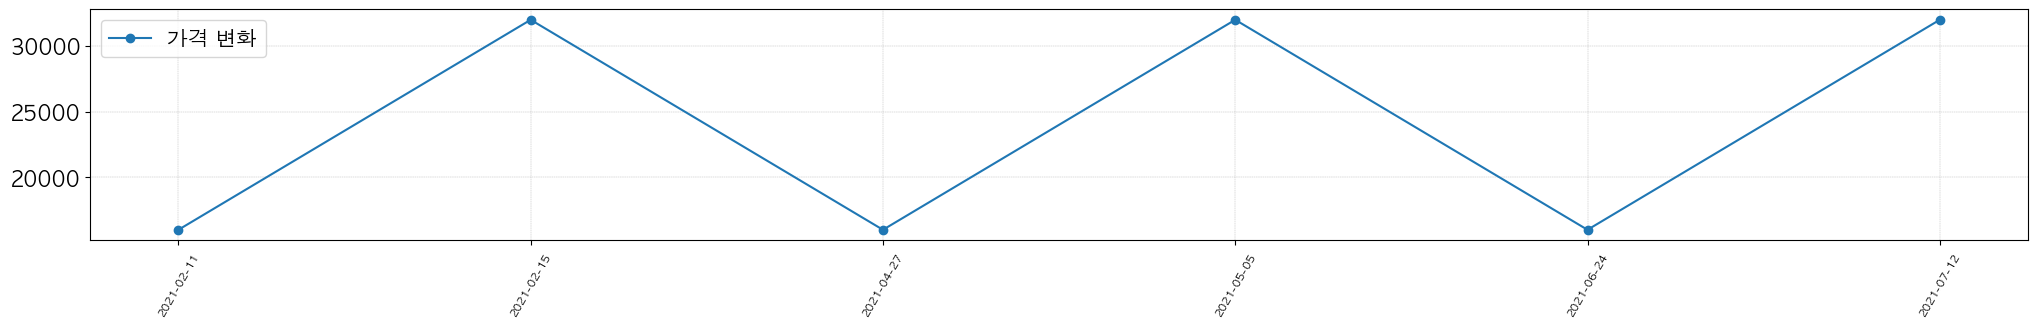

In [6]:
# 2021년도
drow_pc_chart(ymw_list=_2021, col='use_time', color='blue')
drow_pc_chart(ymw_list=_2021, col='use_tiem_prev_week', color='blue')
drow_pc_chart(ymw_list=_2021, col='percent', color='blue')
drow_price_chart(['2021'])

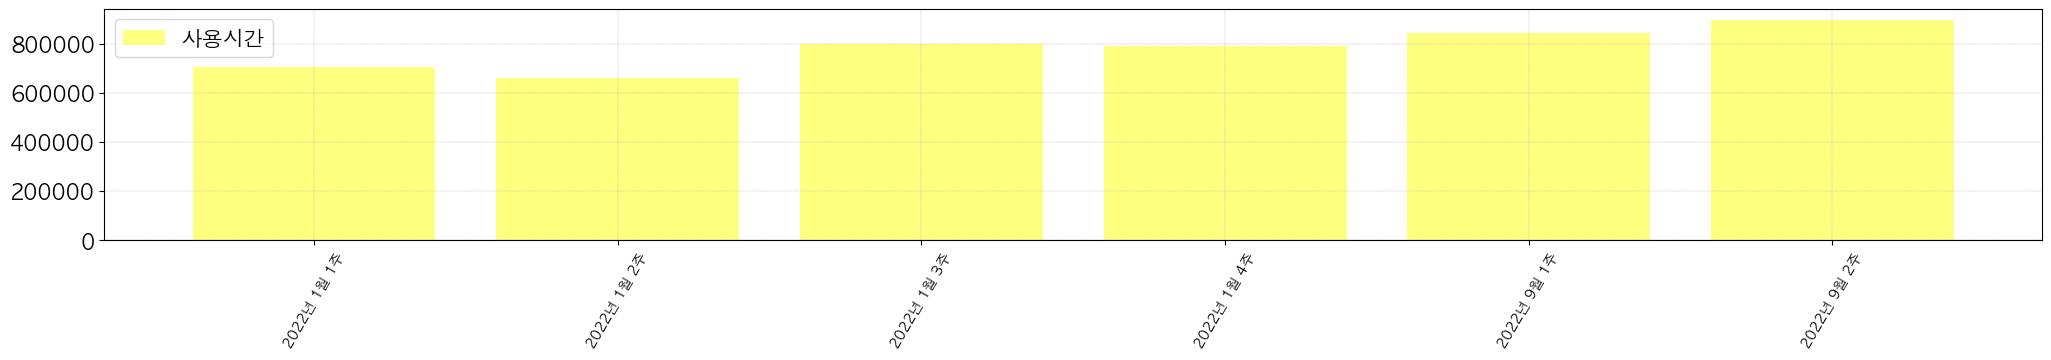

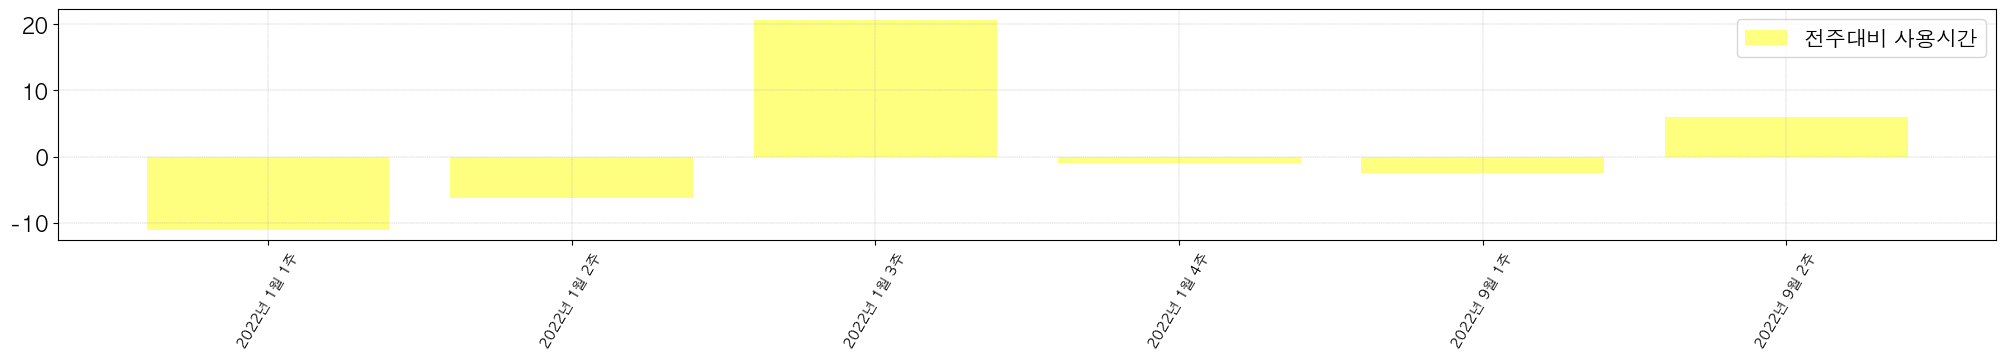

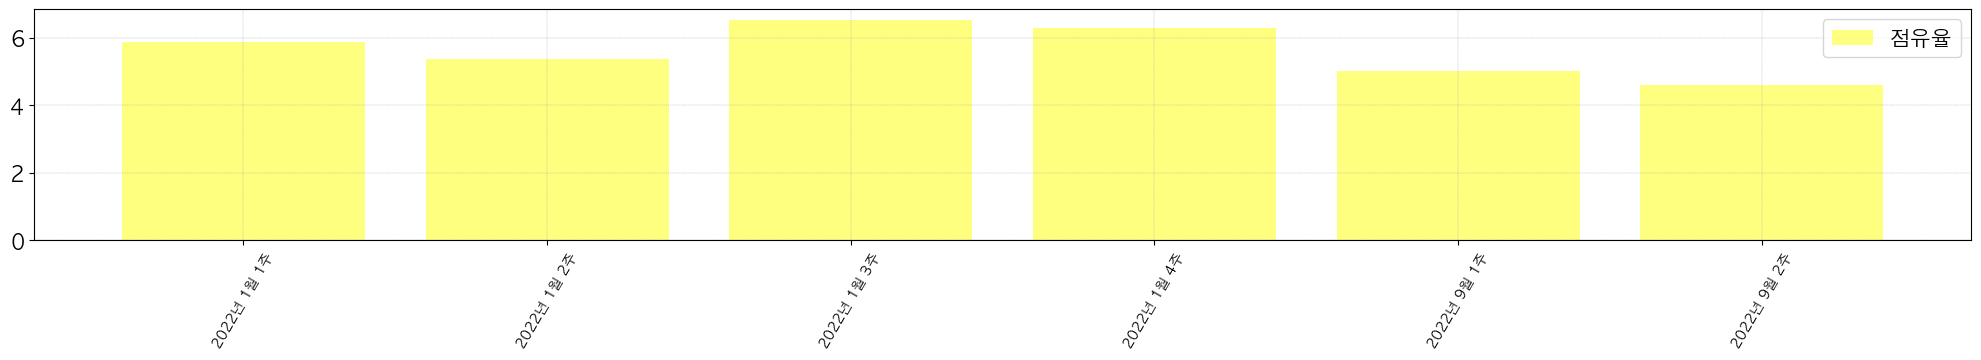

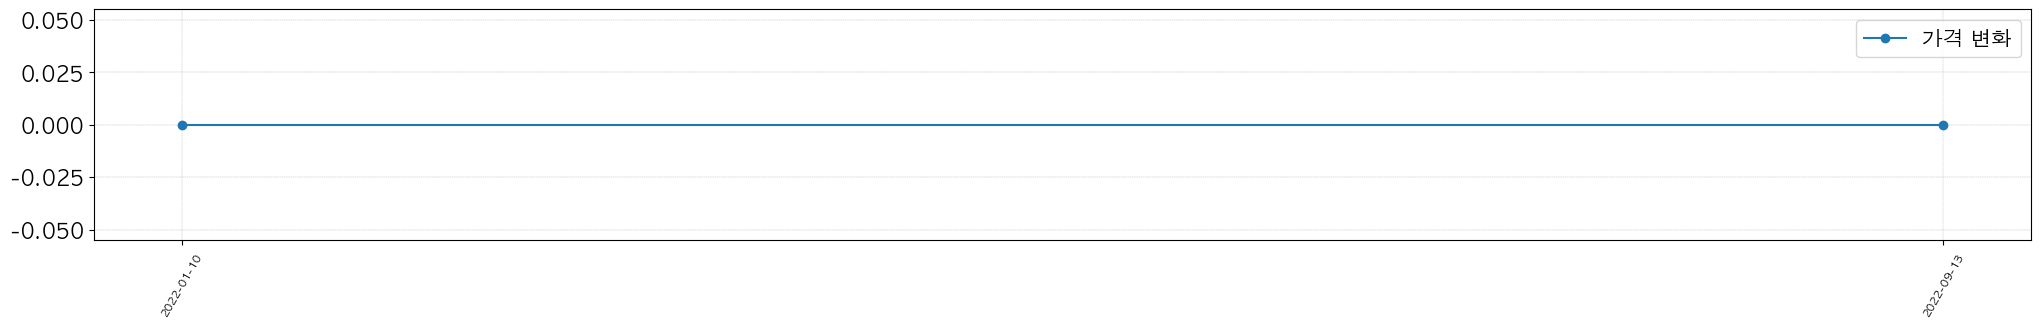

In [7]:
# 2022년도
drow_pc_chart(ymw_list=_2022, col='use_time', color='yellow')
drow_pc_chart(ymw_list=_2022, col='use_tiem_prev_week', color='yellow')
drow_pc_chart(ymw_list=_2022, col='percent', color='yellow')
drow_price_chart(['2022'])